# CreditCard Fraud Detection

### Importing libraries

The firts step will be importing all the important libraries

## Introduction

The present project has been taken from kaggle.com and it is an contribution of Renjith Madhavan, however I have made some modifications to the original one, the two main added modificattion are:
* Addition of Coeficcient and Odd Table, to very that all the fearures are relvant for the model.
* Get the model's prediction accuracy 
* Graph of the each feature and the prediction to visualize which features are the most relevant to the model
* Run the machine learning process with scaled inputs

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix
import pickle

### Loading data

Load the data and make some exploration about it as explore all the data features, get know the type of data and obtain some statistical paramerts of each feature.

In [2]:
data_raw = pd.read_csv('creditcard.csv')
data_raw.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data_raw.shape

(284807, 31)

### Fraud counts

The feature Classs point out if the transaction is fraud or not and they are represents as "0" or "1" respectively. The following code give us an idea of how many fraud case there are, in a comparative with the genuine transactions.

In [6]:
class_names = {0: 'Not Fraud', 1: 'Fraud'}
print(data_raw.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


### Ploting Data

This section plot all the values of each features, there are one graph for each feature. 


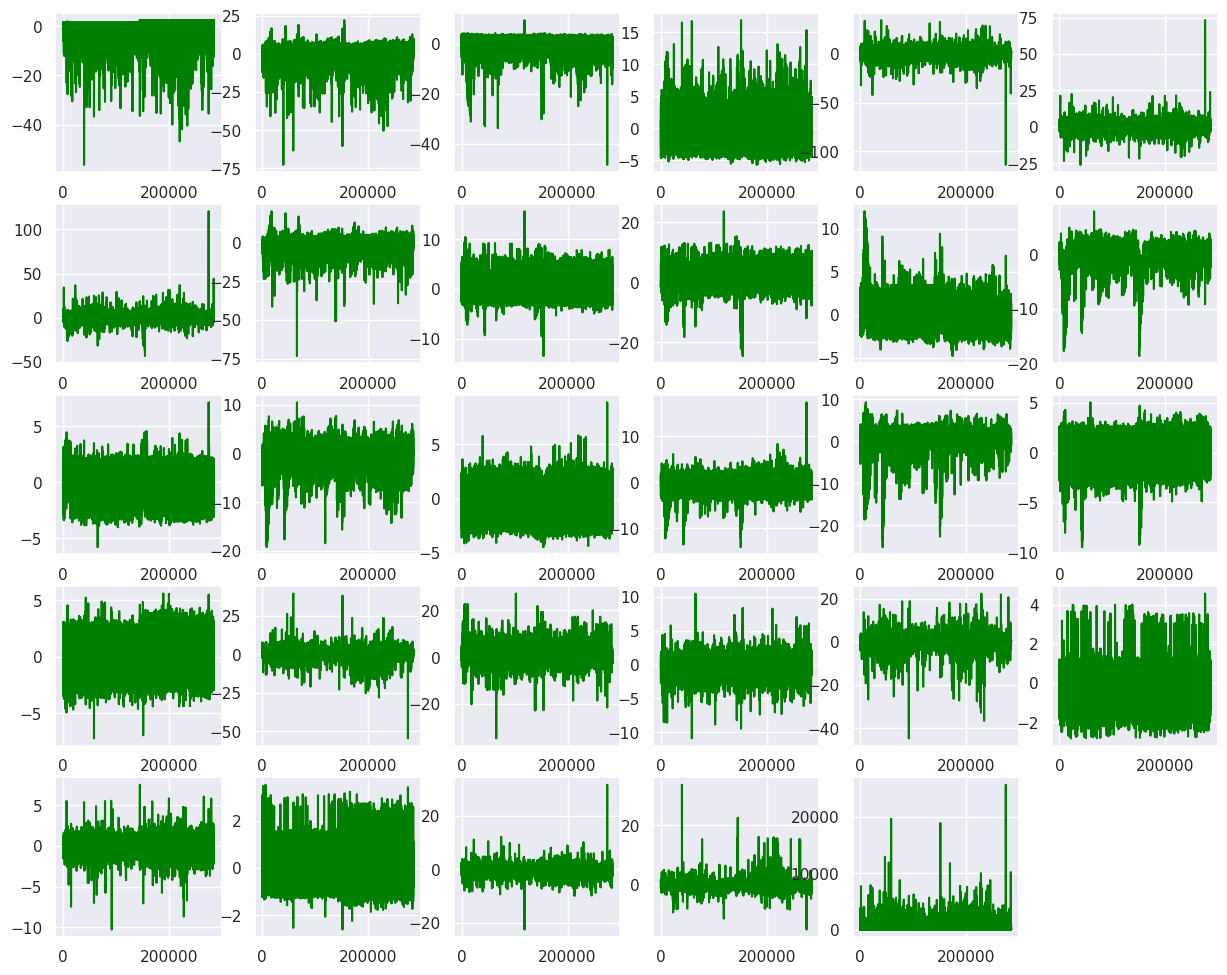

In [7]:
fig = plt.figure(figsize = (15,12))
plt.subplot(5, 6, 1) ; plt.plot(data_raw.V1, c='Green')  
plt.subplot(5, 6, 2) ; plt.plot(data_raw.V2, c='Green')
plt.subplot(5, 6, 3) ; plt.plot(data_raw.V3, c='Green')
plt.subplot(5, 6, 4) ; plt.plot(data_raw.V4, c='Green')
plt.subplot(5, 6, 5) ; plt.plot(data_raw.V5, c='Green')
plt.subplot(5, 6, 6) ; plt.plot(data_raw.V6, c='Green')
plt.subplot(5, 6, 7) ; plt.plot(data_raw.V7, c='Green')
plt.subplot(5, 6, 8) ; plt.plot(data_raw.V8, c='Green')
plt.subplot(5, 6, 9) ; plt.plot(data_raw.V9, c='Green')
plt.subplot(5, 6, 10) ; plt.plot(data_raw.V10, c='Green')
plt.subplot(5, 6, 11) ; plt.plot(data_raw.V11, c='Green')
plt.subplot(5, 6, 12) ; plt.plot(data_raw.V12, c='Green')
plt.subplot(5, 6, 13) ; plt.plot(data_raw.V13, c='Green') 
plt.subplot(5, 6, 14) ; plt.plot(data_raw.V14, c='Green') 
plt.subplot(5, 6, 15) ; plt.plot(data_raw.V15, c='Green') 
plt.subplot(5, 6, 16) ; plt.plot(data_raw.V16, c='Green') 
plt.subplot(5, 6, 17) ; plt.plot(data_raw.V17, c='Green')
plt.subplot(5, 6, 18) ; plt.plot(data_raw.V18, c='Green')
plt.subplot(5, 6, 19) ; plt.plot(data_raw.V19, c='Green')
plt.subplot(5, 6, 20) ; plt.plot(data_raw.V20, c='Green')
plt.subplot(5, 6, 21) ; plt.plot(data_raw.V21, c='Green')
plt.subplot(5, 6, 22) ; plt.plot(data_raw.V22, c='Green')
plt.subplot(5, 6, 23) ; plt.plot(data_raw.V23, c='Green')
plt.subplot(5, 6, 24) ; plt.plot(data_raw.V24, c='Green')
plt.subplot(5, 6, 25) ; plt.plot(data_raw.V25, c='Green')
plt.subplot(5, 6, 26) ; plt.plot(data_raw.V26, c='Green')
plt.subplot(5, 6, 27) ; plt.plot(data_raw.V27, c='Green')
plt.subplot(5, 6, 28) ; plt.plot(data_raw.V28, c='Green')
plt.subplot(5, 6, 29) ; plt.plot(data_raw.Amount, c='Green')
plt.show()

### Preparing the data

Previously to introduce thye data to the machine learning process, tha data has to be prepared, in ortder to achive this the following steps will be performed:
* Drop no relevant columns, in this case "Time"
* Split the known results (targets) and all the features(inputs)
* Get the inputs scaled
* Split the data to get two separated data sets: train dataset and test dataset. Using 70% for training and 30% for test


In [8]:
inputs = data_raw.copy()
inputs = inputs.drop(['Class'], axis = 1)
inputs = inputs.drop(['Time'], axis = 1)
inputs_scaler = StandardScaler()
inputs_scaler.fit(inputs)
scaled_inputs = inputs_scaler.transform(inputs)
targets = data_raw.copy()
targets = targets.loc[:,['Class']]

In [9]:
inputs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
targets

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [11]:
x_train, x_test, y_train , y_test = train_test_split(scaled_inputs, targets, train_size = 0.7, random_state = 20)

### Creating and training the model

The steps to train the machine learing model are:
* Using sklearn module train a logistic regression model with the train features and train targets
* Explore the results with a summary table that includes the coeficient of each feature, odd ratio, this information is useful for discard features that are not particualry important to overall result of the model(in this particular case all the features are relevant)


In [12]:
reg =  LogisticRegression(max_iter=1000)
reg.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [13]:
reg.intercept_

array([-8.59267222])

In [14]:
reg.coef_

array([[ 0.25742629, -0.03914906,  0.14081435,  0.99752824,  0.10274273,
        -0.17316947, -0.19288189, -0.21945882, -0.325081  , -0.95151252,
        -0.01919859, -0.03937796, -0.32060041, -0.52439932,  0.01007831,
        -0.0175544 ,  0.02144274, -0.09356851,  0.14154286, -0.36406407,
         0.28134427,  0.37877685, -0.06053883, -0.01968792, -0.02341132,
        -0.07821468, -0.33868423, -0.09892202,  0.23374094]])

In [15]:
feature_names = inputs.columns.values
summary_table = pd.DataFrame(columns=['Feature Names'], data=feature_names)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds Ratio', ascending=False)
summary_table

,Feature Names,Coefficient,Odds Ratio
0,Intercept,-8.592672,0.000185
1,V1,0.257426,1.293596
2,V2,-0.039149,0.961607
3,V3,0.140814,1.151211
4,V4,0.997528,2.711571
5,V5,0.102743,1.108206
6,V6,-0.173169,0.840995
7,V7,-0.192882,0.824579
8,V8,-0.219459,0.802953
9,V9,-0.325081,0.722469


### Testing Model

Keeping using sklearn module the following steps are performed with thye test dataset:
* Get the predcitions of the test data and the model obtained 
* Get the accuracy of the model for this case is more than 99 %
* Print a confusion matrix to better visulization of the predection power

In [16]:
pred = reg.predict(x_test)

In [17]:
reg.score(x_test, y_test)

0.9991456292499094

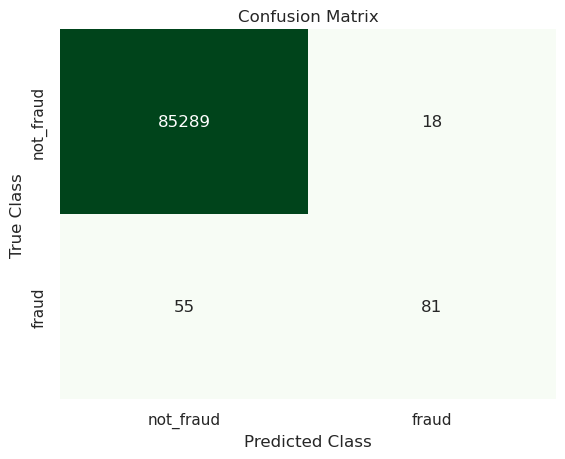

In [18]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
matrix_dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(matrix_dataframe, annot=True, cbar=None, cmap='Greens', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### Exploring individuals features

Ploting each feature and the predction, can help us to see which feature has more power prediction.

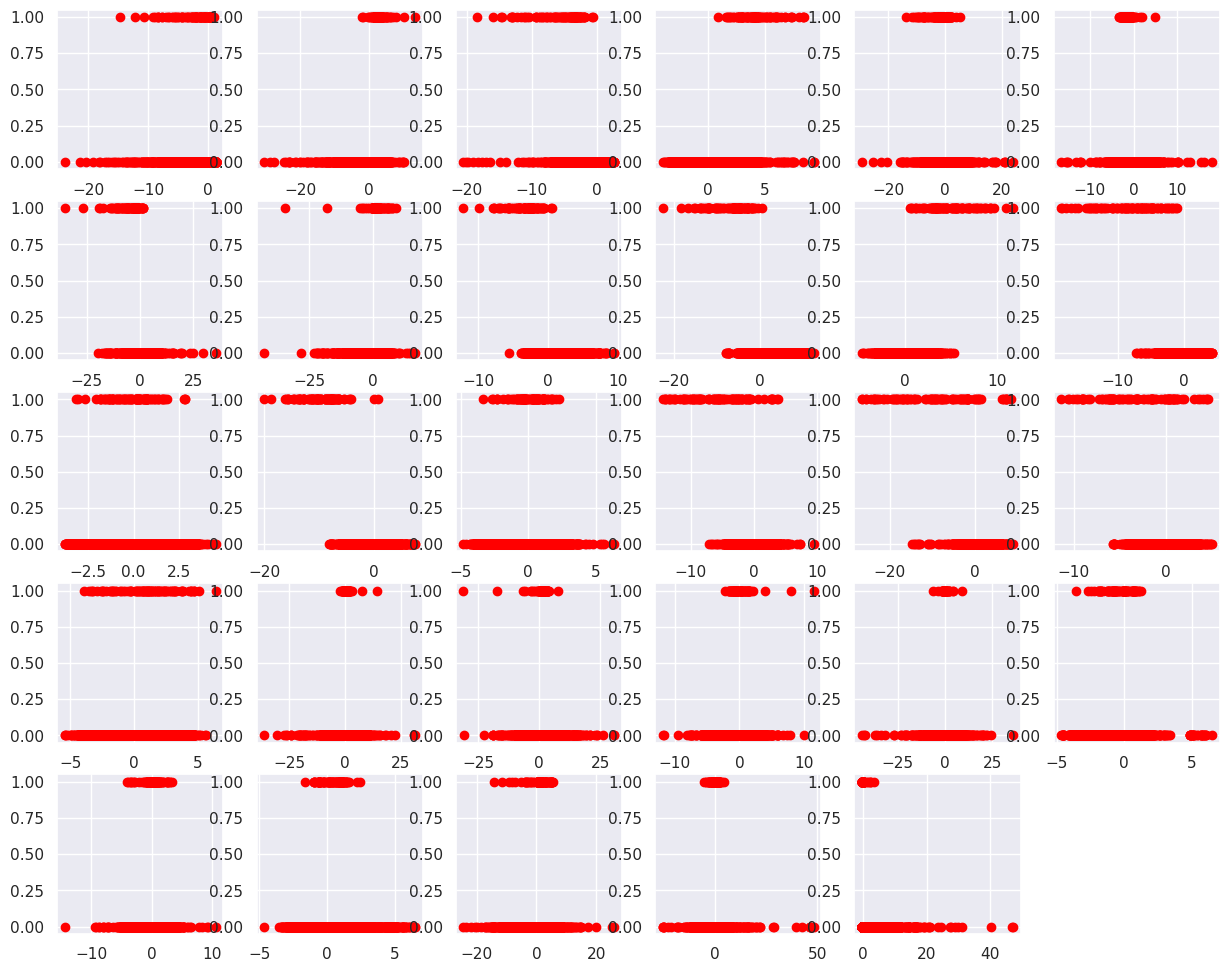

In [19]:
fig = plt.figure(figsize = (15,12))
plt.subplot(5, 6, 1) ; plt.scatter(x_test[:,0],pred, cmap=pred, c='red')
plt.subplot(5, 6, 2) ; plt.scatter(x_test[:,1],pred, cmap=pred, c='red')
plt.subplot(5, 6, 3) ; plt.scatter(x_test[:,2],pred, cmap=pred, c='red')
plt.subplot(5, 6, 4) ; plt.scatter(x_test[:,3],pred, cmap=pred, c='red')
plt.subplot(5, 6, 5) ; plt.scatter(x_test[:,4],pred, cmap=pred, c='red')
plt.subplot(5, 6, 6) ; plt.scatter(x_test[:,5],pred, cmap=pred, c='red')
plt.subplot(5, 6, 7) ; plt.scatter(x_test[:,6],pred, cmap=pred, c='red')
plt.subplot(5, 6, 8) ; plt.scatter(x_test[:,7],pred, cmap=pred, c='red')
plt.subplot(5, 6, 9) ; plt.scatter(x_test[:,8],pred, cmap=pred, c='red')
plt.subplot(5, 6, 10) ; plt.scatter(x_test[:,9],pred, cmap=pred, c='red')
plt.subplot(5, 6, 11) ; plt.scatter(x_test[:,10],pred, cmap=pred, c='red')
plt.subplot(5, 6, 12) ; plt.scatter(x_test[:,11],pred, cmap=pred, c='red')
plt.subplot(5, 6, 13) ; plt.scatter(x_test[:,12],pred, cmap=pred, c='red')
plt.subplot(5, 6, 14) ; plt.scatter(x_test[:,13],pred, cmap=pred, c='red')
plt.subplot(5, 6, 15) ; plt.scatter(x_test[:,14],pred, cmap=pred, c='red')
plt.subplot(5, 6, 16) ; plt.scatter(x_test[:,15],pred, cmap=pred, c='red')
plt.subplot(5, 6, 17) ; plt.scatter(x_test[:,16],pred, cmap=pred, c='red')
plt.subplot(5, 6, 18) ; plt.scatter(x_test[:,17],pred, cmap=pred, c='red')
plt.subplot(5, 6, 19) ; plt.scatter(x_test[:,18],pred, cmap=pred, c='red')
plt.subplot(5, 6, 20) ; plt.scatter(x_test[:,19],pred, cmap=pred, c='red')
plt.subplot(5, 6, 21) ; plt.scatter(x_test[:,20],pred, cmap=pred, c='red')
plt.subplot(5, 6, 22) ; plt.scatter(x_test[:,21],pred, cmap=pred, c='red')
plt.subplot(5, 6, 23) ; plt.scatter(x_test[:,22],pred, cmap=pred, c='red')
plt.subplot(5, 6, 24) ; plt.scatter(x_test[:,23],pred, cmap=pred, c='red')
plt.subplot(5, 6, 25) ; plt.scatter(x_test[:,24],pred, cmap=pred, c='red')
plt.subplot(5, 6, 26) ; plt.scatter(x_test[:,25],pred, cmap=pred, c='red')
plt.subplot(5, 6, 27) ; plt.scatter(x_test[:,26],pred, cmap=pred, c='red')
plt.subplot(5, 6, 28) ; plt.scatter(x_test[:,27],pred, cmap=pred, c='red')
plt.subplot(5, 6, 29) ; plt.scatter(x_test[:,28],pred, cmap=pred, c='red')
plt.show()

### Save the model

The final step is to save the model for future use in a file.

In [20]:
with open('creditcard-fraud_model', 'wb') as file:
    pickle.dump(reg, file)

# About this Dataset

**Information given by** <a href="https://www.kaggle.com/renjithmadhavan/credit-card-fraud-detection-using-python" target="_blank">Credit Card Fraud Detection using Python by Renjith Madhavan</a>

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook